In [1]:
%matplotlib nbagg
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
print("start!")

rnorm=np.ones(20)
print (rnorm)

ims = []
dataall=[]
print(dataall)
dataall=np.zeros((4000, 2409))
N = 2409  # 1レコード番号あたりに格納されているデータの数。
M = 4000  # レコードの総数。
numb=1
for i in range(8):
    fol=format(i, '03b')
    for j in range(10):
        numb+=1
        mass="{0:02d}".format(j+1)
        fname='./glbdsk_str'+fol+"M"+mass+'.dat'
        f = open(fname, 'r')
        dty = np.dtype([('data', '<' + str(N) + 'f')])
        chunk = np.fromfile(f, dtype=dty, count=M)
        data = []
        for k in range(M):
            data.append(chunk[k]['data'])
        data=np.array(data)
        dataall=np.dstack((dataall, data))
        if(j==7):
            print(fname,numb)
            #print(dataall.nbytes)
#print(dataall.shape)
print("end")
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import gridspec

start!
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[]
./glbdsk_str000M08.dat 9
./glbdsk_str001M08.dat 19
./glbdsk_str010M08.dat 29
./glbdsk_str011M08.dat 39
./glbdsk_str100M08.dat 49
./glbdsk_str101M08.dat 59
./glbdsk_str110M08.dat 69
./glbdsk_str111M08.dat 79
end


In [2]:
rhan=dataall[39,0,21]#au keisan  5=>0.027au   104 =>7au   39 =>1au  125=>10au 177=>20au  333=>70au   398=>100au      rcon
print(rhan)

1.0302250385284424


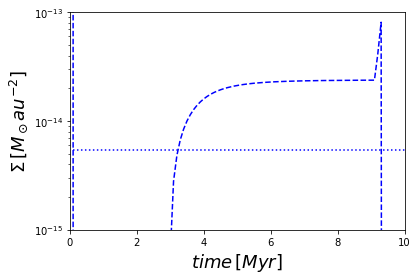

In [98]:
%matplotlib inline
#PE=[1.668e-10,4.965e-10,9.398e-10,1.478e-09,2.099e-09,2.797e-09,3.565e-09,4.399e-09,5.295e-09,6.25e-09]#0.027au
#PE=[3.61e-15,4.965e-10,9.398e-10,1.478e-09,2.099e-09,2.797e-09,3.565e-09,4.399e-09,5.295e-09,1.59e-14]#100au
#PE=[0,0,0,0,0,0,0,0,0,4.14e-11]#20au
PE=[0,0,0,0,0,0,0,0,0,2.0e-12]#70au
#PE=[4.58e-13,0,0,0,0,0,0,0,0,0]#7au
for cond in range(8):
    #plt.cla()
    plt.xlim(0, 10)
    #plt.ylim(5e-13, 5e-11)
    plt.ylim(1e-15, 1e-13)
    plt.xlabel(r'$time\,[Myr]$', fontsize=18)
    #plt.ylabel(r'$\dot{\Sigma}\, [g\,cm^{-2}yr^{-1}]$', fontsize=18)
     #plt.ylabel(r'$\.{\Sigma}  \,[M_\odot yr^{-1} au^{-2}]$', fontsize=18)
    plt.ylabel(r'${\Sigma}  \,[M_\odot  au^{-2}]$', fontsize=18)
    for ms in range(10):
        k=1+ms+(cond*10)
        pltdat=dataall[:,:,k]
        T=(np.array(range(299)))/10 #time 0.1Myr
        #rcon=5  #0.027au
        #rcon=125 #10au
        #rcon=104 #7au
        #rcon=177 #20au
        rcon=333 #70au
        #rcon=398 #100au
        #rcon=420 #100?au
        kar=2*np.pi*dataall[rcon,0,21]*(dataall[rcon+1,0,21]-dataall[rcon-1,0,21])#kyoku ritu 2 pi r dr
        #kar=dataall[rcon,0,21]-dataall[rcon-1,0,21]# dr
        #print(kar,dataall[rcon,0,21],dataall[rcon,0,21]-dataall[rcon-1,0,21])
        sigma=np.array(pltdat[rcon,2:301])
        sigman=np.roll(sigma, -1)
        trb=pltdat[rcon,604:903]
        trbin=pltdat[rcon-1,604:903]
        trbout=pltdat[rcon+1,604:903]
        wnd=-pltdat[rcon,905:1204]
        rvz=pltdat[rcon,1206:1505]
        atrq=pltdat[rcon,1507:1806]
        pgrf=pltdat[rcon,1808:2107]
        dmz=pltdat[rcon,2109:2408]
        #plt.plot(T,-trb,color="pink")     #乱流粘性)
        #plt.plot(T,wnd, color="green")   #円盤風トルク
        wid=(1+ms)/5
        #mss=10/(1+ms)
        mss=(1+ms)/10
        taux=[30,4.5,15.8]
        if cond ==3:#PEstrong #2:#PE #weak
            #plt.plot(T,-trb+wnd, linewidth = wid, linestyle = "dashed",color='#8a2be2',label=r'$\.{M}_r$ DW+PE')
            #plt.plot(T,dmz, linewidth = wid,color='#8a2be2',label=r'$\.{M}_z$ DW+PE')
            if ms==0:
                #plt.plot(T,(-trb)-(-trbin), linestyle = "dashed",color="k",label=r'$\.{M}_r$')
                #plt.plot(T,(trb)-(trbin),color="k",label=r'$\.{M}_r$')
                #plt.plot(T,(trb),color="k",label=r'$\.{M}_r$')
                #plt.plot(T,(-trb), linestyle = "dashed",color="k",label=r'$\.{M}_r$') 
                #plt.plot(T,(trbin),color="r",label=r'$\.{M}_r$')
                #plt.plot(T,(-trbin), linestyle = "dashed",color="r",label=r'$\.{M}_r$')     
                
                #plt.plot(T,sigma,color="r",label=r'$\.{M}_r$')  #sigam
                '''plt.plot(T,((trb)-(trbin)),color="k",label=r'$\.{M}_r$',linestyle = "dashed")  #tamaru
                plt.plot(T,-((trb)-(trbin)),color="k",label=r'$\.{M}_r$')  #deteku
                #plt.hlines(PE[ms],1e-1,2.97e1, linestyle = "dotted",color="k")
                #plt.plot(T,(-trbin)-(-trb),color="b",linestyle = "dashed",label=r'$\.{M}_r$')   #detetku
                
                plt.plot(T,((trb)-(trbin))/kar,color="k",label=r'$\.{M}_r$')  #tamaru
                plt.plot(T,-((trb)-(trbin))/kar,color="k",label=r'$\.{M}_r$',linestyle = "dashed")  #deteku
                plt.hlines(PE[ms],1e-1,2.97e1, linestyle = "dotted",color="k")
                '''
                #plt.plot(T,(dmz),color="k",label=r'$\.{M}_z$ DW')
                #plt.hlines(PE[ms],1e-1,2.97e1, linestyle = "dotted",color="k")
                #plt.text(taux[0]*0.9,2.4e-9,r'$ \tau_{\mathrm{life}, 0.1M_\odot}$', fontsize=18)
                #plt.annotate('', fontsize=18, xy=[taux[0],3e-11], xytext=[taux[0],2e-9],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor='k',edgecolor='k'))
            '''if ms==2:
                plt.plot(T,(trb+wnd), linestyle = "dashed",color="r",label=r'$\.{M}_r$')
                plt.plot(T,(dmz)*mss,color="r",label=r'$\.{M}_z$ DW')
                plt.hlines(PE[ms],1e-1,2.2e1, linestyle = "dotted",color="r")
                plt.text(taux[1]*0.9,1.5e-8,r'$ \tau_{\mathrm{life}, 0.3M_\odot}$', fontsize=18)
                plt.annotate('', fontsize=18, xy=[taux[1],1.2e-9], xytext=[taux[1],1.2e-8],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor='r',edgecolor='r'))
            '''
            if ms==9:
                #plt.plot(T[:300],(trb)[:300],color="b",label=r'$\.{M}_r$')
                #plt.plot(T[:300],(-trb)[:300], linestyle = "dashed",color="b",label=r'$\.{M}_r$')   
                #plt.plot(T[:300],(trbin)[:300],color="r",label=r'$\.{M}_r$')
                #plt.plot(T[:300],(-trbin)[:300], linestyle = "dashed",color="r",label=r'$\.{M}_r$')      
                #plt.plot(T[:300],(trbout)[:300],color="g",label=r'$\.{M}_r$')
                #plt.plot(T[:300],(-trbout)[:300], linestyle = "dashed",color="g",label=r'$\.{M}_r$')   
                #plt.plot(T[:300],(trb)[:300]+(-trbin)[:300],color="b",label=r'$\.{M}_r$')  #hairu
                   
                #plt.plot(T[:300],(trbin)[:300]-(trb)[:300],color="r",label=r'$\.{M}_r$')   
                #plt.plot(T[:300],(trb)[:300]-(trbin)[:300],color="b",label=r'$\.{M}_r$')
                #plt.plot(T[:300],(trb)[:300]-(trbin)[:300],color="b",label=r'$\.{M}_r$')  #hairu
                #plt.plot(T[:300],((-trb)[:300]-(-trbin)[:300]), linestyle = "dashed",color="b",label=r'$\.{M}_r$')   #deteku
                
                #plt.plot(T[:60],(dmz[:60]),color="b",label=r'$\.{M}_z$ DW')
                
                #plt.plot(T,sigma,color="r",label=r'$\.{M}_r$')  #sigam
                
                plt.hlines(PE[ms]/kar,1e-1,30e0, linestyle = "dotted",color="b")
                #plt.plot(T,((trb)-(trbin)),color="b",label=r'$\.{M}_r$')  #tamaru
                #plt.plot(T,-((trb)-(trbin)),color="b",label=r'$\.{M}_r$',linestyle = "dashed")  #deteku
                
                #plt.plot(T,((trb)-(trbin))/kar,color="b",label=r'$\.{M}_r$')  #tamaru
                #plt.plot(T,-((trb)-(trbin))/kar,color="b",label=r'$\.{M}_r$',linestyle = "dashed")  #deteku
                
                #plt.plot(T,((trb)-(trbin)*0.7),color="b",label=r'$\.{M}_r$')  #tamaru
                plt.plot(T,-((trbout)-(trb))/kar,color="b",label=r'$\.{M}_r$',linestyle = "dashed")  #deteku
                #plt.plot(T,(sigman-sigma),color="k",label=r'$\.{M}_r$',linestyle = "dashed")  #deteku
                #plt.plot(T,(sigma-sigman)/1e10,color="k",label=r'$\.{M}_r$')  #deteku
                #plt.text(taux[2]*0.9,1.3e-7,r'$ \tau_{\mathrm{life}, 1.0M_\odot}$', fontsize=18)
                #plt.annotate('', fontsize=18, xy=[taux[2],3e-11], xytext=[taux[2],1e-7],arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10,connectionstyle='arc3',facecolor='b',edgecolor='b'))
    #plt.xscale('log')
    plt.yscale('log')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.show()

In [32]:
10**0.75

5.623413251903491

In [80]:
100/5.6

17.857142857142858

In [ ]:
for cond in range(8): #DW 4
    for ms in range(10):
        k=1+ms+(cond*10)

In [84]:
print(dataall[39,1,41]) #1au,5Myr,cond=k 0.1M DWweak

6298.642578125


In [85]:
print(dataall[39,1,50]) #1au,5Myr,cond=k 1.0M DWweak

16087.748046875


In [102]:
for time in range(50):
    print(time,dataall[39,time,41]/dataall[39,time,50])

0 1.0
1 0.3915179775175864
2 0.4374291900422554
3 0.49564500928210825
4 0.6194318255754399
5 0.7733809254161758
6 0.8550001095350984
7 0.8751570035516639
8 0.8667063026905677
9 0.8458802781185468
10 0.8181347434616505
11 0.7859535653037254
12 0.7518966331833775
13 0.7165312770434171
14 0.6803582679188769
15 0.6445657420379535
16 0.6082454834090644
17 0.5736226937334835
18 0.540258054639609
19 0.5080907968386705
20 0.47709371371104325
21 0.44764610587888265
22 0.4196269120517243
23 0.3929455653694895
24 0.36781815033025567
25 0.3441062386968141
26 0.32169872404661326
27 0.30071668210993935
28 0.28102538902538904
29 0.2625133625177738
30 0.2449461381117516
31 0.22882555818042552
32 0.21372351955863417
33 0.19967368806689673
34 0.18657048374928606
35 0.17432422311598056
36 0.16295055393878646
37 0.1523602828174881
38 0.14247713575389143
39 0.13330709913837746
40 0.12477625177502955
41 0.11682105873974387
42 0.1094427378724218
43 0.10258078999868872
44 0.09608375703504733
45 0.090156595985